In [1]:
import numpy as np

# Introduction to NumPy

    Aggregations: Min, Max, and Everything In Between
    Computation on Arrays: Broadcasting
    Comparisons, Masks, and Boolean Logic

## Aggregations: Min, Max, and Everything In Between

NumPy has fast built-in aggregation functions for working on arrays;

In [3]:
L = np.random.random(100)
np.sum(L) #computes the sum of the array, much faster than sum(L)

51.068457301866779

In [4]:
np.min(L)

0.00054433267722653333

In [5]:
np.max(L)

0.97216800865829145

For min, max, sum, and several other NumPy aggregates, a shorter syntax is to use methods of the array object itself:

In [6]:
L.sum()

51.068457301866779

In [7]:
L.min()

0.00054433267722653333

In [8]:
L.max()

0.97216800865829145

One common type of aggregation operation is an aggregate along a row or column. 

Say you have some data stored in a two-dimensional array:

In [9]:
M = np.random.random((3,4))
M

array([[ 0.19151465,  0.54914921,  0.46218402,  0.13424145],
       [ 0.72990834,  0.6177376 ,  0.30850456,  0.51913003],
       [ 0.52846605,  0.73614556,  0.59291178,  0.49364452]])

By default, each NumPy aggregation function will return the aggregate over the entire array:

In [10]:
M.sum()

5.8635377747634498

Aggregation functions take an additional argument specifying the axis along which the aggregate is computed. For example, we can find the minimum value within each column by specifying axis=0:

In [11]:
M.min(axis=0) #0 axis indicates we want the min values of the columns

array([ 0.19151465,  0.54914921,  0.30850456,  0.13424145])

In [12]:
M.max(axis=1) #1 axis indicates we want the max value of each row

array([ 0.54914921,  0.72990834,  0.73614556])

The axis keyword specifies the dimension of the array that will be collapsed, rather than the dimension that will be returned.

NumPy provides many other aggregation functions, but we won't discuss them in detail here. Additionally, most aggregates have a NaN-safe counterpart that computes the result while ignoring missing values, which are marked by the special IEEE floating-point NaN value.

### Example: What is the Average Height of US Presidents?

In [13]:
!head -4 president_heights.csv

In [14]:
import pandas as pd
data = pd.read_csv('president_heights.csv')
print(data.columns)
data.head()

Index(['order', 'name', 'height(cm)'], dtype='object')


,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183


In [15]:
heights = np.array(data['height(cm)']) #grab the height column of our df as an np.array
heights

array([189, 170, 189, 163, 183, 171, 185, 168, 173, 183, 173, 173, 175,
       178, 183, 193, 178, 173, 174, 183, 183, 168, 170, 178, 182, 180,
       183, 178, 182, 188, 175, 179, 183, 193, 182, 183, 177, 185, 188,
       188, 182, 185])

Now that we have this data array, we can compute a variety of summary statistics:

In [16]:
print("Mean height:       ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height:    ", heights.min())
print("Maximum height:    ", heights.max())

Mean height:        179.738095238
Standard deviation: 6.93184344275
Minimum height:     163
Maximum height:     193


In [17]:
print("25th percentile:   ", np.percentile(heights, 25))
print("Median:            ", np.median(heights))
print("75th percentile:   ", np.percentile(heights, 75))

25th percentile:    174.25
Median:             182.0
75th percentile:    183.0


In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style

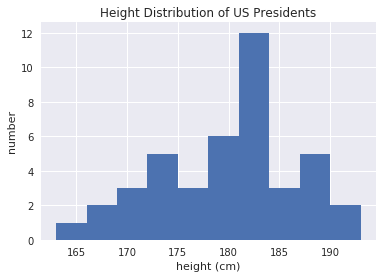

In [19]:
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number');

## Computation on Arrays: Broadcasting

We saw in the previous section how NumPy's universal functions can be used to vectorize operations and thereby remove slow Python loops. Another means of vectorizing operations is to use NumPy's broadcasting functionality. 

**Broadcasting** is simply a set of rules for applying binary ufuncs (e.g., addition, subtraction, multiplication, etc.) on arrays of different sizes.

Recall that for arrays of the same size, binary operations are performed on an element-by-element basis:

In [20]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

Broadcasting allows these types of binary operations to be performed on arrays of different sizes–for example, we can just as easily add a scalar (think of it as a zero-dimensional array) to an array:

In [21]:
a + 5 #adds 5 to each element of a

array([5, 6, 7])

In [22]:
M = np.ones((3, 3))
M

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [23]:
M + a #a is stretched or broadcast accross the 2nd dimension to match the shape of M

array([[ 1.,  2.,  3.],
       [ 1.,  2.,  3.],
       [ 1.,  2.,  3.]])

While these examples are relatively easy to understand, more complicated cases can involve broadcasting of both arrays. Consider the following example:

In [24]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]
print(a)
print('')
print(b)

[0 1 2]

[[0]
 [1]
 [2]]


In [25]:
a + b #turned a and b into two 3x3 matricies

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

Broadcasting in NumPy follows a strict set of rules to determine the interaction between the two arrays:

**Rule 1:** If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.

**Rule 2:** If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.

**Rule 3:** If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

In [26]:
print('adding a two-dimensional array to a one-dimensional array\n')
M = np.ones((2, 3))
a = np.arange(3)
print('M :', M)
print('a: ', a, '\n')

print('Shape of M: ', M.shape)
print('Shape of a: ', a.shape, '\n')
print('array a has fewer dimensions so it will be padded on the left with 1 \n')
print('Shape of M: ', M.shape)
print('Shape of a: ', (1,3), '\n')
print('now that the first dimension of a disagrees with M, we stretch a to match. \n')
print('Shape of M: ', M.shape)
print('Shape of a: ', (2,3), '\n')
print('Result; \n')
print(M+a)

adding a two-dimensional array to a one-dimensional array

M : [[ 1.  1.  1.]
 [ 1.  1.  1.]]
a:  [0 1 2] 

Shape of M:  (2, 3)
Shape of a:  (3,) 

array a has fewer dimensions so it will be padded on the left with 1 

Shape of M:  (2, 3)
Shape of a:  (1, 3) 

now that the first dimension of a disagrees with M, we stretch a to match. 

Shape of M:  (2, 3)
Shape of a:  (2, 3) 

Result; 

[[ 1.  2.  3.]
 [ 1.  2.  3.]]


In [27]:
print('Here both arrays need to be broadcast: \n')
a = np.arange(3).reshape((3, 1))
b = np.arange(3)
print('a :', a)
print('b: ', b, '\n')

print('Shape of a: ', a.shape)
print('Shape of b: ', b.shape, '\n')
print('Rule 1 says we must pad the shape of b with ones: \n')
print('Shape of a: ', a.shape)
print('Shape of b: ', (1,3), '\n')
print('And rule 2 tells us that we upgrade each of these ones to match the corresponding size of the other array: \n')
print('Shape of a: ', (3,3))
print('Shape of b: ', (3,3), '\n')
print('Result; \n')
print(a+b)

Here both arrays need to be broadcast: 

a : [[0]
 [1]
 [2]]
b:  [0 1 2] 

Shape of a:  (3, 1)
Shape of b:  (3,) 

Rule 1 says we must pad the shape of b with ones: 

Shape of a:  (3, 1)
Shape of b:  (1, 3) 

And rule 2 tells us that we upgrade each of these ones to match the corresponding size of the other array: 

Shape of a:  (3, 3)
Shape of b:  (3, 3) 

Result; 

[[0 1 2]
 [1 2 3]
 [2 3 4]]


In [28]:
print('Here is an example in which the two arrays are not compatible: \n')
M = np.ones((3, 2))
a = np.arange(3)
print('M :', M)
print('a: ', a, '\n')

print('Shape of M: ', M.shape)
print('Shape of a: ', a.shape, '\n')
print('Again, rule 1 tells us that we must pad the shape of a with ones: \n')
print('Shape of M: ', M.shape)
print('Shape of a: ', (1,3), '\n')
print('By rule 2, the first dimension of a is stretched to match that of M \n')
print('Shape of M: ', M.shape)
print('Shape of a: ', (3,3), '\n')
print('Now we hit rule 3–the final shapes do not match, so these two arrays are incompatible, as we can observe by attempting this operation: \n')
%xmode Plain
print(M+a)

Here is an example in which the two arrays are not compatible: 

M : [[ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]]
a:  [0 1 2] 

Shape of M:  (3, 2)
Shape of a:  (3,) 

Again, rule 1 tells us that we must pad the shape of a with ones: 

Shape of M:  (3, 2)
Shape of a:  (1, 3) 

By rule 2, the first dimension of a is stretched to match that of M 

Shape of M:  (3, 2)
Shape of a:  (3, 3) 

Now we hit rule 3–the final shapes do not match, so these two arrays are incompatible, as we can observe by attempting this operation: 

Exception reporting mode: Plain


ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

Note the potential confusion here: you could imagine making a and M compatible by, say, padding a's shape with ones on the right rather than the left. But this is not how the broadcasting rules work! 

That sort of flexibility might be useful in some cases, but it would lead to potential areas of ambiguity. If right-side padding is what you'd like, you can do this explicitly by reshaping the array 

In [29]:
a[:, np.newaxis].shape

(3, 1)

In [30]:
M + a[:, np.newaxis]

array([[ 1.,  1.],
       [ 2.,  2.],
       [ 3.,  3.]])

Also note that while we've been focusing on the + operator here, these broadcasting rules apply to any binary ufunc. For example, here is the logaddexp(a, b) function, which computes log(exp(a) + exp(b)) with more precision than the naive approach:

In [31]:
np.logaddexp(M, a[:, np.newaxis])

array([[ 1.31326169,  1.31326169],
       [ 1.69314718,  1.69314718],
       [ 2.31326169,  2.31326169]])

 One commonly seen example is when centering an array of data. Imagine you have an array of 10 observations, each of which consists of 3 values. Using the standard convention, we'll store this in a 10×3 array:

In [32]:
X = np.random.random((10, 3))

We can compute the mean of each feature using the mean aggregate across the first dimension:

In [33]:
Xmean = X.mean(0)
Xmean

array([ 0.36624558,  0.46160566,  0.48253367])

And now we can center the X array, by subtracting the mean;

In [34]:
X_centered = X - Xmean

In [35]:
X_centered

array([[-0.26106901,  0.24511027,  0.15853505],
       [ 0.01554708, -0.05615484,  0.32786929],
       [-0.28658464,  0.40944016,  0.01182787],
       [-0.23767776, -0.25659377, -0.34327964],
       [ 0.20522259, -0.26295506,  0.14274677],
       [ 0.24607395, -0.1834853 ,  0.26988216],
       [-0.05743488, -0.45653346,  0.09316953],
       [ 0.14851297,  0.30485935,  0.14136645],
       [ 0.08916413,  0.22983487, -0.38792129],
       [ 0.13824556,  0.02647779, -0.4141962 ]])

In [36]:
#To double-check that we've done this correctly, 
#we can check that the centered array has near zero mean:

X_centered.mean(0)

array([ -4.99600361e-17,  -3.88578059e-17,  -2.22044605e-17])

One place that broadcasting is very useful is in displaying images based on two-dimensional functions. 

If we want to define a function $z=f(x,y)$, broadcasting can be used to compute the function across the grid:

In [37]:
# x and y have 50 steps from 0 to 5
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]
print(x)
print('')
print(y)

[ 0.          0.10204082  0.20408163  0.30612245  0.40816327  0.51020408
  0.6122449   0.71428571  0.81632653  0.91836735  1.02040816  1.12244898
  1.2244898   1.32653061  1.42857143  1.53061224  1.63265306  1.73469388
  1.83673469  1.93877551  2.04081633  2.14285714  2.24489796  2.34693878
  2.44897959  2.55102041  2.65306122  2.75510204  2.85714286  2.95918367
  3.06122449  3.16326531  3.26530612  3.36734694  3.46938776  3.57142857
  3.67346939  3.7755102   3.87755102  3.97959184  4.08163265  4.18367347
  4.28571429  4.3877551   4.48979592  4.59183673  4.69387755  4.79591837
  4.89795918  5.        ]

[[ 0.        ]
 [ 0.10204082]
 [ 0.20408163]
 [ 0.30612245]
 [ 0.40816327]
 [ 0.51020408]
 [ 0.6122449 ]
 [ 0.71428571]
 [ 0.81632653]
 [ 0.91836735]
 [ 1.02040816]
 [ 1.12244898]
 [ 1.2244898 ]
 [ 1.32653061]
 [ 1.42857143]
 [ 1.53061224]
 [ 1.63265306]
 [ 1.73469388]
 [ 1.83673469]
 [ 1.93877551]
 [ 2.04081633]
 [ 2.14285714]
 [ 2.24489796]
 [ 2.34693878]
 [ 2.44897959]
 [ 2.55102041]

In [38]:
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt

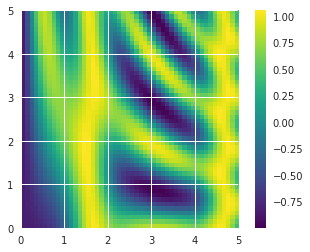

In [40]:
#We'll use Matplotlib to plot this two-dimensional array

plt.imshow(z, origin='lower', extent=[0, 5, 0, 5],
           cmap='viridis')
plt.colorbar();

The result is a compelling visualization of the two-dimensional function.

## Comparisons, Masks, and Boolean Logic

Masking comes up when you want to extract, modify, count, or otherwise manipulate values in an array based on some criterion: for example, you might wish to count all values greater than a certain value, or perhaps remove all outliers that are above some threshold.

NumPy can implement comparison operators such as < (less than) and > (greater than) as element-wise ufuncs. 

The result of these comparison operators is always an array with a Boolean data type. 

All six of the standard comparison operations are available:

In [49]:
x = np.array([1, 2, 3, 4, 5])
print(x < 3)
print(x > 3)
print(x <= 3)
print(x >= 3)
print(x != 3)
print(x == 3)

[ True  True False False False]
[False False False  True  True]
[ True  True  True False False]
[False False  True  True  True]
[ True  True False  True  True]
[False False  True False False]


It is also possible to do an element-wise comparison of two arrays, and to include compound expressions:

In [50]:
print((2 * x) == (x ** 2)) #when is 2x equal to x squared (just at x=2)

[False  True False False False]


In [53]:
# work on arrays of any size and shape
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [54]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]], dtype=bool)

In [55]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

To count the number of True entries in a Boolean array, **np.count_nonzero** is useful:

In [56]:
np.count_nonzero(x < 6)

8

We see that there are eight array entries that are less than 6.

Another way to get at this information is to use np.sum; in this case, False is interpreted as 0, and True is interpreted as 1:

In [57]:
np.sum(x < 6)

8

The benefit of sum() is that like with other NumPy aggregation functions, this summation can be done along rows or columns as well:

In [58]:
np.sum(x < 6, axis = 1) #counts values less than 6 in each row

array([4, 2, 2])

If we're interested in quickly checking whether any or all the values are true, we can use **np.any** or **np.all**:

In [59]:
print(np.any(x > 8))
print(np.all(x > 0))

True
False


np.all and np.any can be used along particular axes as well. For example:

In [62]:
print(np.all(x < 8, axis = 1)) #all values in each row less that 8?
print(np.all(x < 8, axis = 0)) #all values in each column less that 8?

[ True False  True]
[ True False  True  True]


Operator 	Equivalent ufunc

**&**	np.bitwise_and		

**|**	np.bitwise_or

**^**	np.bitwise_xor

**~**	np.bitwise_not

In [73]:
y = np.ones((3,4))
print(x)
print(y)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]
[[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]


In [77]:
print((x>0) & (x<8))
print('')
print((x>3) | (x<8))

[[ True False  True  True]
 [ True False  True  True]
 [ True  True  True  True]]

[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]


We can obtain a Boolean array for the condition (x < 5) easily. To select these values we index using the boolean array. This is known as a **masking operation**.

In [78]:
x[x < 5]

array([0, 3, 3, 3, 2, 4])

One common point of confusion is the difference between the keywords and and or on one hand, and the operators **&** and **|** on the other hand. When would you use one versus the other?

The difference is this: and/or **gauge the truth or falsehood of entire object**, while **&** and **|** refer to **bits within each object**.

When you use and/or, it's equivalent to asking Python to treat the object as a **single Boolean entity**. 

In Python, all nonzero integers will evaluate as True. 

In [81]:
print(bool(42))
print(bool(0))
print(bool(42 and 0))
print(bool(42 or 0))

True
False
False
True


When you use **&** and **|** on integers, the expression operates on the bits of the element, applying the and or the or to the individual bits making up the number:

In [82]:
print(bin(42))
print(bin(59))
print(bin(42 & 59))
print(bin(42 | 559))

0b101010
0b111011
0b101010
0b1000101111


Similarly, when doing a Boolean expression on a given array, you should use **|** or **&** rather than or/and:

In [83]:
x = np.arange(10)
(x > 4) & (x < 8)

array([False, False, False, False, False,  True,  True,  True, False, False], dtype=bool)

In [84]:
(x > 4) and (x < 8) #throws error

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

So remember this: and and or perform a single Boolean evaluation on an entire object, while & and | perform multiple Boolean evaluations on the content (the individual bits or bytes) of an object. 

**For Boolean NumPy arrays, the latter is nearly always the desired operation.**